In [1]:
# Inserindo bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Importando dados
df = pd.read_csv('database-atividade.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Preparação do dataset

- Para os features X, vamos remover as 2 primeiras colunas e a última, pois essas não são valores de interesse;
- Para os valores de referência y, usamos a coluna de índice 1 do dataset original. Além disso aplicamos um dicionário para mapear ‘B’ de Benigno para 0 e ‘M’ de Maligno para 1, pois o modelo precisa de variáveis numéricas ao invés de texto. Ignorar os avisos warning do sistema

In [3]:
X = df.iloc[:,2:-1]
y = df.iloc[:,1]
y=y.replace({'B':0,'M':1})

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_11040\1569780444.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=y.replace({'B':0,'M':1})


In [4]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:

y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

### Divisão treino-teste

Para a divisão em treino e teste, vamos separar 70% para treino e 30% para teste, declarando o seed random.

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train.shape,X_test.shape, y_train.shape, y_test.shape


((398, 30), (171, 30), (398,), (171,))

### Redução Dimensionalidade com PCA

Para a aplicação do PCA é importante lembrar que primeiro devemos aplicar o Standard Scaler, usando fit_transform na base de treino, mas apenas transform na base de teste.

In [7]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [8]:
# aplicar a transformação com PCA nos dados já escalonados
pca = PCA(n_components=10, random_state=10)
pca.fit(X_train_scaled)

PCA(n_components=10, random_state=10)

Número de componentes para explicar 70.0% da variância: 3


<Axes: >

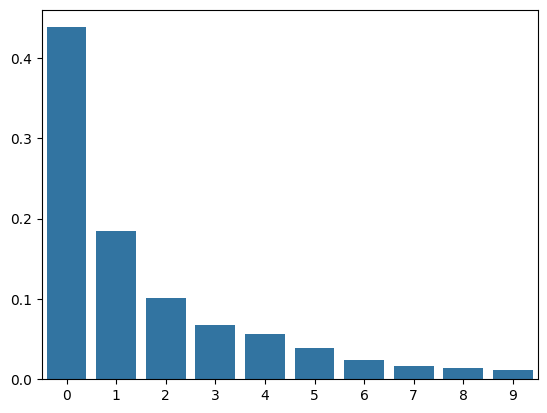

In [9]:
# analisar a explicabilidade das variâncias nos dados, a partir dos componentes
array_pca = pca.explained_variance_ratio_

p_target = 0.7
p_sum = 0
for component in range(len(array_pca)):
    p_sum += array_pca[component]
    if p_sum >= p_target:
        print(f'Número de componentes para explicar {p_target*100}% da variância: {component+1}')
        break
    
sns.barplot(array_pca)

Criação dos datasets X_train_pca e X_test_pca, transformados pelo PCA e utilizando o número de componente 3 (representando 70% da variacao)

In [10]:
pca = PCA(n_components=3, random_state=10)
# aplicar a transformação com PCA nos dados já escalonados
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_pca.shape, X_test_pca.shape

((398, 3), (171, 3))

<Axes: >

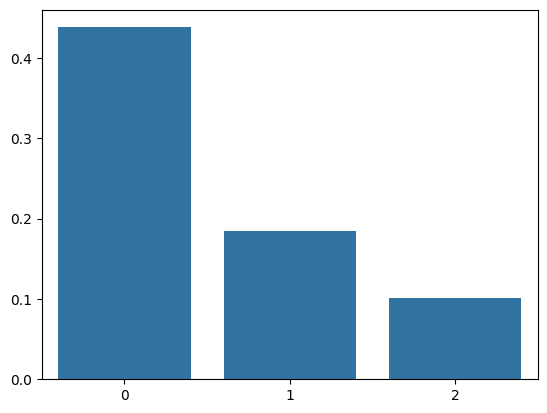

In [11]:
# 3 componentes explicam 70% da variância dos dados
array_pca = pca.explained_variance_ratio_    
sns.barplot(array_pca)

## Busca de Hiperparâmetros com validação cruzada

Iremos utilizar um DecisionTreeClassifier como modelo base e os hiperparâmetros que queremos testar serão:
- scoring = 'accuracy'
- cv: 5
- max_depth:[3,None]
- min_samples_split:[2,10]

In [12]:
# Definir o modelo e os parâmetros para a busca em grade
model = DecisionTreeClassifier(random_state=10)
param_grid = {
    'min_samples_split': [2, 10],
    'max_depth': [3, None]
}

# Configurar o GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy', cv=5)

# Ajustar o GridSearchCV aos dados
grid.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [3, None], 'min_samples_split': [2, 10]},
             scoring='accuracy')

In [13]:
# Supondo que 'grid' é o objeto GridSearchCV já ajustado

# Resultados detalhados da validação cruzada
cv_results = grid.cv_results_

# Índice do melhor conjunto de parâmetros
best_index = grid.best_index_

# Melhor conjunto de parâmetros encontrado
best_params = grid.best_params_

# Melhor pontuação obtida
best_score = grid.best_score_

# Melhor estimador encontrado
best_estimator = grid.best_estimator_

# Exibindo os resultados
print("CV Results:", cv_results)
print("Best Index:", best_index)
print("Best Params:", best_params)
print("Best Score:", best_score)
print("Best Estimator:", best_estimator)

CV Results: {'mean_fit_time': array([0.0023695 , 0.00173988, 0.00189486, 0.00187511]), 'std_fit_time': array([0.00088392, 0.00012934, 0.0001529 , 0.00014395]), 'mean_score_time': array([0.00147562, 0.001232  , 0.00114646, 0.00114141]), 'std_score_time': array([0.00051907, 0.00044283, 0.00038458, 0.00034905]), 'param_max_depth': masked_array(data=[3, 3, None, None],
             mask=[False, False, False, False],
       fill_value=np.str_('?'),
            dtype=object), 'param_min_samples_split': masked_array(data=[2, 10, 2, 10],
             mask=[False, False, False, False],
       fill_value=999999), 'params': [{'max_depth': 3, 'min_samples_split': 2}, {'max_depth': 3, 'min_samples_split': 10}, {'max_depth': None, 'min_samples_split': 2}, {'max_depth': None, 'min_samples_split': 10}], 'split0_test_score': array([0.9125, 0.9125, 0.95  , 0.9375]), 'split1_test_score': array([0.975 , 0.975 , 0.9375, 0.95  ]), 'split2_test_score': array([0.9375, 0.9375, 0.9375, 0.925 ]), 'split3_test_sc

## Método Ensemble

 aplicar o método Bagging, utilizando como modelo base nossa árvore de decisão com os melhores hiperparâmetros encontrados na etapa anterior.
 - (Best Estimator: DecisionTreeClassifier(max_depth=3,min_samples_split= 2, random_state=10)).

In [14]:
best_model =  DecisionTreeClassifier(max_depth=3,min_samples_split= 2, random_state=10)

Construir o modelo ensemble com 100 estimadores:

In [15]:
ensemble = BaggingClassifier(estimator=best_model, n_estimators=100, random_state=10)

In [16]:
ensemble.fit(X_train_pca, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                   random_state=10),
                  n_estimators=100, random_state=10)

In [18]:
y_pred = ensemble.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.9532163742690059